In [ ]:
#Ml python project random forrest model created for identifying written alphabets in the english language

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Convert the target labels to categorical format
y_train = to_categorical(y_train, num_classes=10)  # 10 classes for digits in MNIST
y_test = to_categorical(y_test, num_classes=10)  # 10 classes for digits in MNIST

# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 26 output classes for alphabets

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2023 - accuracy: 0.9417 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0489 - val_accuracy: 0.9833
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0333 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0372 - val_accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0315 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0304 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0351 - val_accuracy:

2/2 [==============================] - 0s 3ms/step


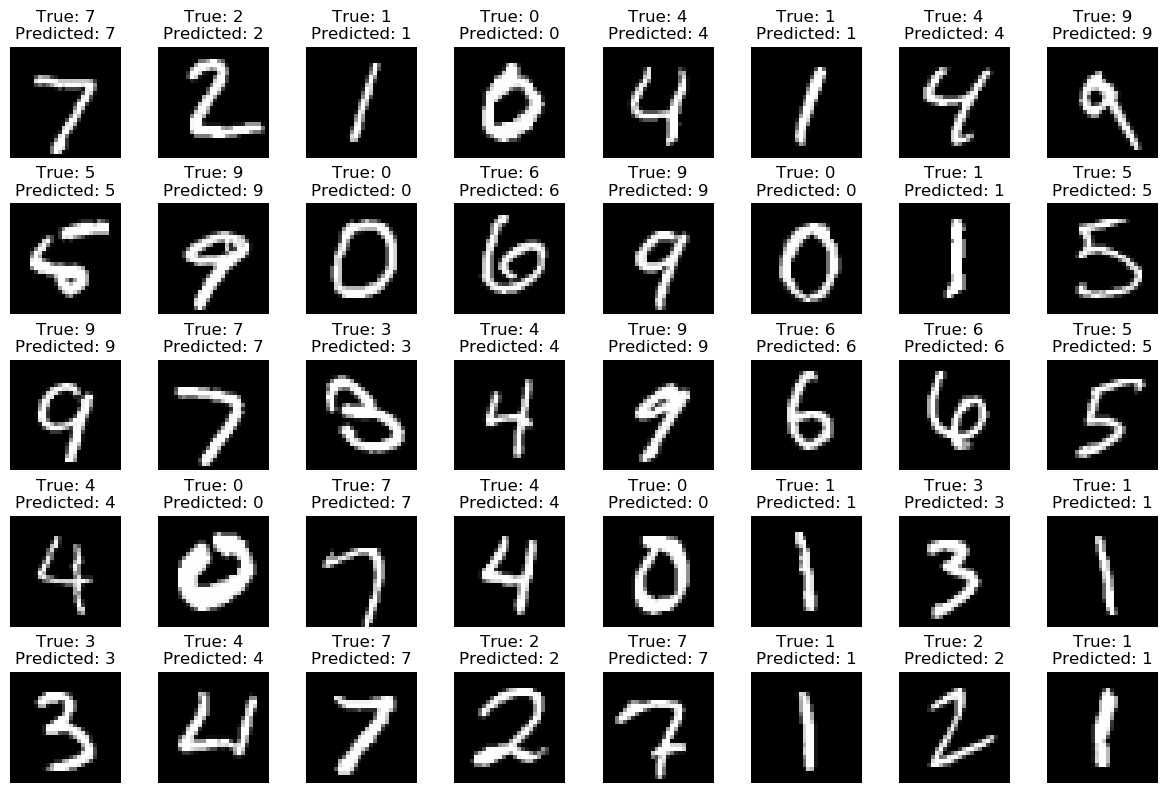

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Select a few random test images
sample_images = X_test[:40]
sample_labels = y_test[:40]

predictions = model.predict(sample_images)
predicted_labels = tf.argmax(predictions, axis=1)

fig, axs = plt.subplots(5, 8, figsize=(12, 8))
axs = axs.ravel()

for i in range(len(sample_images)):
    axs[i].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'True: {tf.argmax(sample_labels[i])}\nPredicted: {predicted_labels[i]}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()